In [1]:
#FyntraCustomerData.csv

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix

import matplotlib.pyplot as plt
from seaborn import jointplot, pairplot

In [3]:
DATA_PATH = 'E:/Edureka_Python-Course/Data Sources/Day_6/'
df_raw = pd.read_csv(DATA_PATH+'FyntraCustomerData.csv', low_memory=False)

---
# Pre Data analysis

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df_raw.head().transpose()

,0,1,2,3,4
Email,mstephenson@fernandez.com,hduke@hotmail.com,pallen@yahoo.com,riverarebecca@gmail.com,mstephens@davidson-herman.com
Address,"835 Frank Tunnel\nWrightmouth, MI 82180-9605","4547 Archer Common\nDiazchester, CA 06566-8576","24645 Valerie Unions Suite 582\nCobbborough, D...","1414 David Throughway\nPort Jason, OH 22070-1220","14023 Rodriguez Passage\nPort Jacobville, PR 3..."
Avatar,Violet,DarkGreen,Bisque,SaddleBrown,MediumAquaMarine
Avg_Session_Length,34.4973,31.9263,33.0009,34.3056,33.3307
Time_on_App,12.6557,11.1095,11.3303,13.7175,12.7952
Time_on_Website,39.5777,37.269,37.1106,36.7213,37.5367
Length_of_Membership,4.08262,2.66403,4.10454,3.12018,4.44631
Yearly_Amount_Spent,587.951,392.205,487.548,581.852,599.406


In [6]:
df_raw.corr()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_on_App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_on_Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length_of_Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Amount_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


---
# Jointplot of -
# yr_amt_spent vs time_on_website
> The correlation between them is not very significant

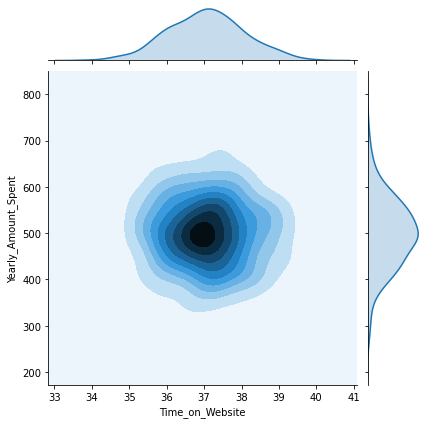

In [7]:
jointplot(df_raw.Time_on_Website, df_raw.Yearly_Amount_Spent, data=df_raw, kind='kde')

---
# Jointplot of yr_amt vs time on app

> The correlation is much stronger and significant than the other feature

> Time spent on app yields more revenue

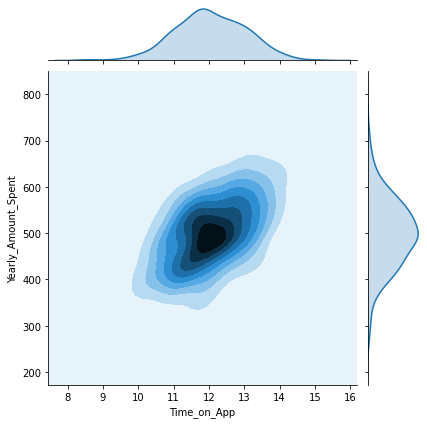

In [8]:
jointplot(df_raw.Time_on_App, df_raw.Yearly_Amount_Spent, data=df_raw, kind='kde')

---
# Pairplot
> The Feature with the highest amount of correlation is 'Length_of_Membership'

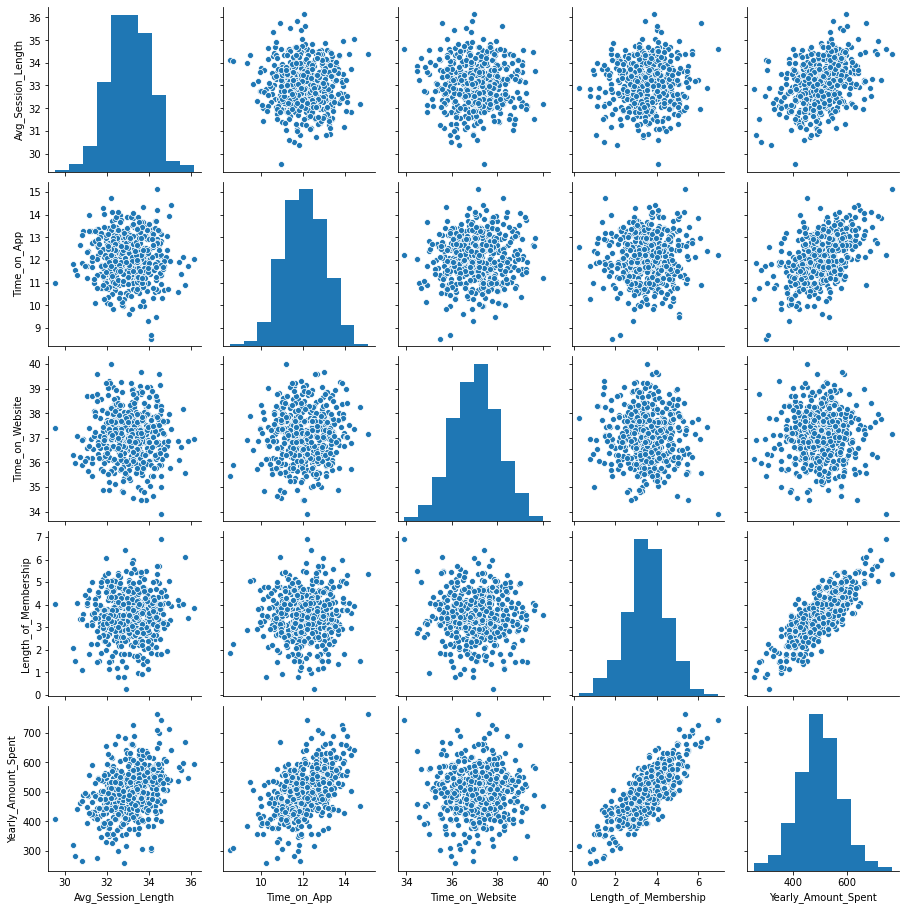

In [9]:
pairplot(df_raw)

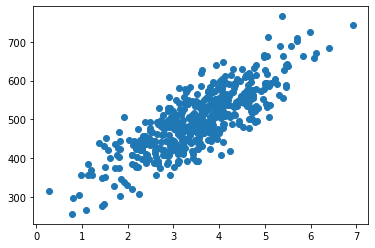

In [10]:
plt.scatter(df_raw.Length_of_Membership, df_raw.Yearly_Amount_Spent)

In [11]:
"""
Sourced from GeeksforGeeks
"""
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

> Overall, the data does seem to follow the trendline

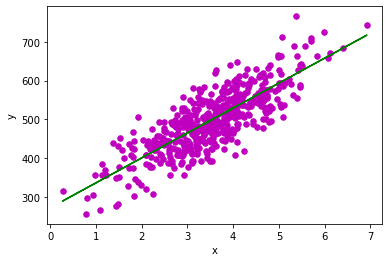

In [12]:
coef = estimate_coef(df_raw.Length_of_Membership, df_raw.Yearly_Amount_Spent)

plot_regression_line(df_raw.Length_of_Membership, df_raw.Yearly_Amount_Spent, coef)


# Model Creation

>The use random_state allows us to generate the same train-test sets
rather than random sets when runned multiple times

In [13]:
train_x, test_x, train_y, test_y = train_test_split(df_raw.drop(['Yearly_Amount_Spent',
                                                                 'Email',
                                                                 'Address',
                                                                 'Avatar']
                                                                , axis=1),
                                                    df_raw.Yearly_Amount_Spent,
                                                    test_size=0.2,
                                                    random_state=85)
train_x

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership
73,32.808698,12.817113,37.031539,3.851579
351,32.189845,11.386776,38.197483,4.808320
321,33.674027,12.968893,37.333107,3.229451
202,31.525752,11.340036,37.039514,3.811248
306,31.912076,11.792972,36.257819,2.395168
...,...,...,...,...
51,33.900224,10.956791,37.266878,2.952669
196,32.733224,11.818572,37.102031,1.503854
397,34.012619,12.914570,36.046204,3.488030
160,32.838100,12.364342,38.039109,3.309182


In [15]:
model_linreg = LinearRegression()

model_linreg.fit(X=train_x, y=train_y)

LinearRegression()

In [16]:
y_pred = model_linreg.predict(test_x)

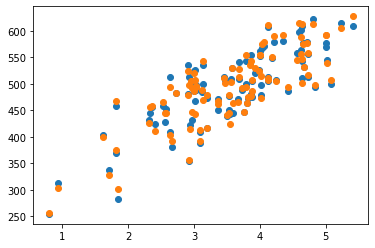

In [17]:
plt.scatter(x=test_x.Length_of_Membership , y=y_pred)
plt.scatter(x=test_x.Length_of_Membership , y=test_y)


# From the initial looks
>the predicions are pretty accurate and precise 
>when compared to the actual data

In [18]:
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [19]:
print(f'Root Mean Squared Error: {RMSE(test_y, y_pred)}')

Root Mean Squared Error: 9.748641229131573


# End results
> the predictions are very accurate

> In the end, shifting more resources towards maintaining the app is more profitable when comapred to website. 

> However shutting down the website is a drastic step but toning the amount of resources utilized in maintiaing the website can be reduced.